In [416]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [417]:
#Kies een afbeelding (die je zelf hebt gemaakt, Afbeelding A) en pas daar image 
#segmentation op toe. 

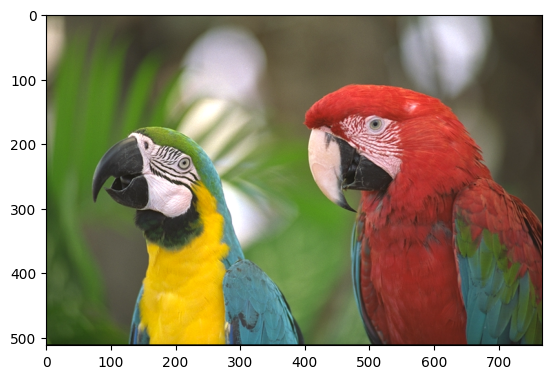

In [418]:
image_A = cv.imread('img/kodim23.png')
image_A = cv.cvtColor(image_A, cv.COLOR_BGR2RGB)
plt.imshow(image_A)
plt.show()

In [419]:
k = 8
pixelVals = image_A.reshape((-1, 3))
pixelVals = np.float32(pixelVals)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
retval, labels, centers = cv.kmeans(pixelVals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

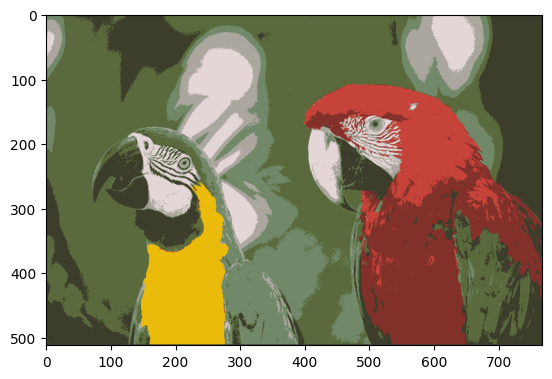

In [420]:
segment_image_A = centers[labels.flatten()]
segment_image_A = segment_image_A.reshape(image_A.shape)
plt.imshow(segment_image_A)
plt.show()

In [421]:
#Kies uit de gesegmenteerde afbeelding een segment (bepaalde kleur) en maak daar 
#en mask van (Mask A)


[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


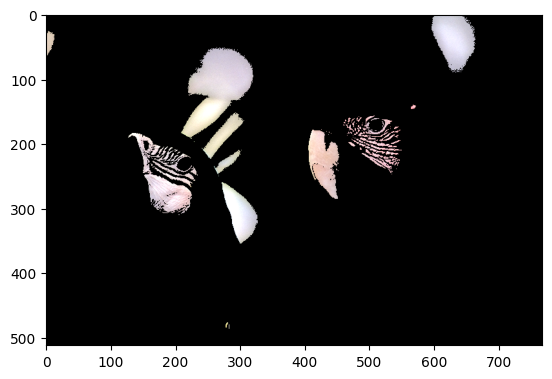

In [422]:
new_labels = labels.reshape((segment_image_A.shape[:-1]))
print(new_labels)
mask_A = cv.inRange(new_labels, 6, 6)
mask_A = cv.bitwise_and(image_A, image_A, mask=mask_A)
plt.imshow(mask_A)
plt.show()

In [423]:
# Maskeer een andere afbeelding (afbeelding B) met dit mask (Mask A). 

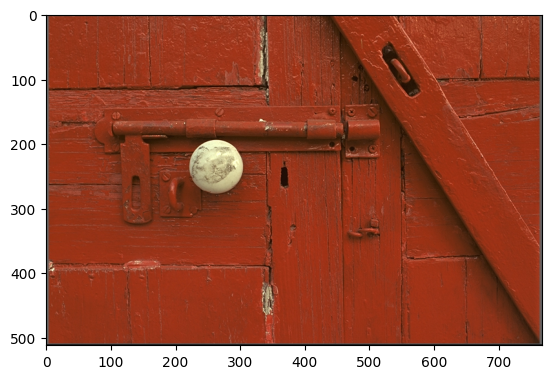

In [424]:
image_B = plt.imread('img/kodim02.png')
plt.imshow(image_B)
plt.show()

In [425]:
masked_image_B = cv.bitwise_and(image_B,image_B, mask=mask_A)
plt.imshow(masked_image_B)
plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [ ]:
# Neem het complement (inverse) van het eerder gemaakte mask (mask A). Dit is je 
# tweede mask (Mask B)

In [ ]:
mask_B = cv.bitwise_not(mask_A)
plt.imshow(mask_B)
plt.show()

In [ ]:
# Maskeer met dit tweede mask (mask B) een nieuwe afbeelding (afbeelding C)

In [ ]:
image_C = cv.imread('img/kodim03.png')  
image_C = cv.cvtColor(image_C, cv.COLOR_BGR2RGB)
plt.imshow(image_C)
plt.show()

In [ ]:
masked_image_C = cv.bitwise_and(image_C, mask_B)
plt.imshow(masked_image_C)
plt.show()

In [ ]:
# Voeg nu de gemaskeerde afbeeldingen B en C samen tot het eind resultaat

In [ ]:
final_image = cv.bitwise_or(masked_image_B, masked_image_C)
plt.imshow(final_image)
plt.show()